In [ ]:
import tensorflow as tf
import pathlib

In [ ]:
data ='./Images'

In [ ]:
data_dir = pathlib.Path(data)
print(data_dir)

/content/Images


In [ ]:
import os
local_dir_path = os.path.dirname(data_dir)
data_dir = os.path.join(local_dir_path, "Images")
print(os.listdir(data_dir))
print(data_dir)

['7630517248_98fb8bee1f_n.jpg', '33838292353_8b143f7980_n.jpg', '2001380507_19488ff96a_n.jpg', '15813862117_dedcd1c56f_m.jpg', '4610018126_21f438d2dc_m.jpg', '5110110938_9da91455c4_m.jpg', '3640845041_80a92c4205_n.jpg', '14332947164_9b13513c71_m.jpg', '6136947177_47ff445eb4_n.jpg', '3861452393_14d2f95157_m.jpg', '34543119581_1fb7e0bd7f_n.jpg', '34524085651_1f0b7e9497_n.jpg', '3025866885_22fb0b61c6_n.jpg', '4820415253_15bc3b6833_n.jpg', '5809489674_5659b3ae5d_n.jpg', '1140299375_3aa7024466.jpg', '302782756_d35cb3e468.jpg', '107592979_aaa9cdfe78_m.jpg', '34554334542_7d8f68a75c_n.jpg', '4413849849_b8d2f3bcf1_n.jpg', '2581171297_b0a249b92b_n.jpg', '5739768868_9f982684f9_n.jpg', '3639009391_0f910681b7.jpg', '34532930772_5cc5fc600d_n.jpg', '4865691548_00319261b8.jpg', '7410356270_9dff4d0e2e_n.jpg', '2349640101_212c275aa7.jpg', '33891703033_822f7810ce_n.jpg', '4727955343_0bb23ac4ae.jpg', '3450822975_7e77d67636_n.jpg', '34643914016_2e659d6e82_n.jpg', '3750771898_cfd50090ba_n.jpg', '8706810197_

In [ ]:
!ls  ./Images

100080576_f52e8ee070_n.jpg    3456403987_5bd5fa6ece_n.jpg
10140303196_b88d3d6cec.jpg    34566613262_fefbcc279a_n.jpg
10172379554_b296050f82_n.jpg  34571214621_f655295459_n.jpg
10172567486_2748826a8b.jpg    34585331601_837dbe5254_n.jpg
10172636503_21bededa75_n.jpg  34585995071_13e07140d8_n.jpg
102841525_bd6628ae3c.jpg      34590677231_0ed33ccd55_n.jpg
10300722094_28fa978807_n.jpg  34591991761_16fc5c9c00_n.jpg
1031799732_e7f4008c03.jpg     34602180741_cf2f671ba5_n.jpg
10391248763_1d16681106_n.jpg  34611565966_9de274f987_n.jpg
10437754174_22ec990b77_m.jpg  34613530216_26cf037012_n.jpg
10437770546_8bb6f7bdd3_m.jpg  34637394046_f85541735d_n.jpg
10437929963_bc13eebe0c.jpg    34637970155_a2b917077c_n.jpg
10466290366_cc72e33532.jpg    34638378196_216d5bbc2e_n.jpg
10466558316_a7198b87e2.jpg    34643914016_2e659d6e82_n.jpg
10555749515_13a12a026e.jpg    34652819496_0b6f758986_n.jpg
10555815624_dc211569b0.jpg    34658035045_7782e95b50_n.jpg
10555826524_423eb8bf71_n.jpg  34661399476_9ea7e2fd53_n.jp

In [ ]:
import os
import shutil

data_dir = "/content/Images"

# Crear una carpeta para las imágenes clasificadas
classified_dir = "/content/ClassifiedImages"
os.makedirs(classified_dir, exist_ok=True)

# Obtener la lista de archivos en el directorio original
files = os.listdir(data_dir)

# Recorrer cada archivo
for file in files:
    # Obtener la ruta completa del archivo
    file_path = os.path.join(data_dir, file)
    
    # Obtener la clase de la imagen (puedes implementar tu lógica de clasificación aquí)
    # Supongamos que la clase está en el nombre del archivo, antes del guion bajo "_"
    class_name = file.split("_")[0]
    
    # Crear una carpeta para la clase si no existe
    class_dir = os.path.join(classified_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)
    
    # Mover el archivo a la carpeta de la clase
    shutil.move(file_path, os.path.join(class_dir, file))


In [ ]:
batch_size = 100
img_height = 180
img_width = 180

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    classified_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)


Found 760 files belonging to 760 classes.
Using 608 files for training.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(type(train_data))
print(dir(train_data))

<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
['_GeneratorState', '__abstractmethods__', '__bool__', '__class__', '__class_getitem__', '__debug_string__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__tf_tracing_type__', '__weakref__', '_abc_impl', '_add_trackable_child', '_add_variable_with_custom_getter', '_apply_debug_options', '_as_serialized_graph', '_batch_size', '_checkpoint_dependencies', '_common_args', '_consumers', '_convert_variables_to_tensors', '_deferred_dependencies', '_deserialization_dependencies', '_deserialize_from_proto', '_drop_remainder', '_export_to_saved_model_graph', '_flat_shapes', '_flat_structure', '_flat_types', '_functions'

In [ ]:
import numpy as np
images = np.array(list(train_data.map(lambda images, labels: images)))
labels = np.array(list(train_data.map(lambda images, labels: labels)))
print(images.shape)
print(labels.shape)

<ipython-input-54-de9ccd9c8e7a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(list(train_data.map(lambda images, labels: images)))


(7,)
(7,)


<ipython-input-54-de9ccd9c8e7a>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.array(list(train_data.map(lambda images, labels: labels)))


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

g0_batch = images[0]  # Batch de imágenes (100, 180, 180, 3)
g0_batch_normalized = []
for img in g0_batch:
    img_normalized = img_to_array(img)  # Convierte cada imagen a un arreglo de NumPy
    img_normalized = img_normalized.copy()  # Realiza una copia del arreglo
    img_normalized = preprocess_input(img_normalized)  # Normaliza cada imagen
    g0_batch_normalized.append(img_normalized)

g0_batch_normalized = tf.stack(g0_batch_normalized)  # Convierte la lista en un tensor
print(g0_batch_normalized.shape)



(100, 180, 180, 3)


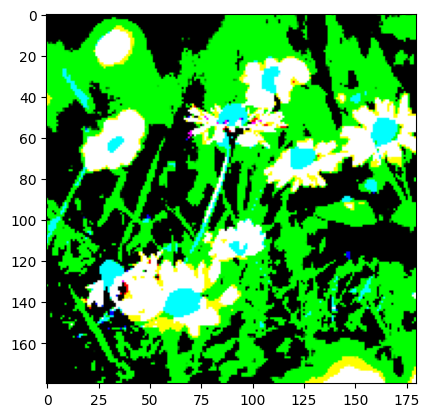

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

g0_batch_normalized = tf.stack(g0_batch_normalized)  # Convierte la lista en un tensor

g0img1_normalized = g0_batch_normalized[10]  # Primera imagen normalizada del lote
g0img1_normalized = np.clip(g0img1_normalized, 0, 1)  # Ajusta los valores al rango [0, 1]
plt.imshow(g0img1_normalized)
plt.show()
